In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
%pip install pypsa[gurobi] "xarray>=2023.8.0" 

zsh:1: no matches found: pypsa[gurobi]
Note: you may need to restart the kernel to use updated packages.


In [3]:
from add_country import *

/Users/marcoul/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [47]:
import pypsa
import pandas as pd
import matplotlib.pyplot as plt
from dataclasses import dataclass

In [5]:
add_scandinavia(network, climatic_year, time_horizon_in_hours)

In [6]:
add_germany(network, climatic_year, time_horizon_in_hours)
add_iberian(network, climatic_year, time_horizon_in_hours)
add_poland(network, climatic_year, time_horizon_in_hours)
add_france(network, climatic_year, time_horizon_in_hours)

In [7]:
network.generators

attribute,bus,control,type,p_nom,p_nom_extendable,p_nom_min,p_nom_max,p_min_pu,p_max_pu,p_set,...,shut_down_cost,min_up_time,min_down_time,up_time_before,down_time_before,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down,p_nom_opt
Generator,,,,,,,,,,,,,,,,,,,,,
scandinaviaFossils,Scandinavia,PQ,,5000.0,False,0.0,inf,0.0,1.0,0.0,...,0.0,1,1,1,0,NaN,NaN,1.0,1.0,0.0
scandinaviaBioEnergies,Scandinavia,PQ,,11000.0,False,0.0,inf,0.0,1.0,0.0,...,0.0,1,1,1,0,NaN,NaN,1.0,1.0,0.0
scandinaviaHydroelectric,Scandinavia,PQ,,57000.0,False,0.0,inf,0.0,1.0,0.0,...,0.0,1,1,1,0,NaN,NaN,1.0,1.0,0.0
scandinaviaWind_on_shore,Scandinavia,PQ,,43000.0,False,0.0,inf,0.0,1.0,0.0,...,0.0,1,1,1,0,NaN,NaN,1.0,1.0,0.0
scandinaviaWind_off_shore,Scandinavia,PQ,,17000.0,False,0.0,inf,0.0,1.0,0.0,...,0.0,1,1,1,0,NaN,NaN,1.0,1.0,0.0
scandinaviaNuclear,Scandinavia,PQ,,11000.0,False,0.0,inf,0.0,1.0,0.0,...,0.0,24,24,1,0,NaN,NaN,1.0,1.0,0.0
scandinaviaSolar,Scandinavia,PQ,,19000.0,False,0.0,inf,0.0,1.0,0.0,...,0.0,1,1,1,0,NaN,NaN,1.0,1.0,0.0
scandinaviaFailure,Scandinavia,PQ,,100000.0,False,0.0,inf,0.0,1.0,0.0,...,0.0,1,1,1,0,NaN,NaN,1.0,1.0,0.0
GER-Hydro_ROR,Germany,PQ,,3933.0,False,0.0,inf,0.0,1.0,0.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0


In [8]:
network

PyPSA Network
Components:
 - Bus: 5
 - Carrier: 19
 - Generator: 40
 - Load: 9
 - StorageUnit: 6
 - Store: 11
Snapshots: 8760

In [9]:
links_list = [
    {"name" : "Link_SCA_Curtailment", "bus0" : "Scandinavia", "bus1" : "Curtailment", "p_nom" : 700000, "efficiency" : 0.95},
    {"name" : "Link_SCA_Germany", "bus0":"Scandinavia", "bus1":"Germany", "p_nom":7415, "efficiency":0.95},
    {"name" : "Link_SCA_Poland", "bus0":"Scandinavia", "bus1":"poland", "p_nom":600, "efficiency":0.95},
    #{"name" : "Link_SCA_Benelux", "bus0":"Scandinavia", "bus1":"Benelux", "p_nom":1400, "efficiency":0.95},
    #{"name" : "Link_Benelux_SCA", "bus0":"Benelux", "bus1":"Scandinavia", "p_nom":1400, "efficiency":0.95},
    {"name" : "Link_Poland_SCA", "bus0":"poland", "bus1":"Scandinavia", "p_nom":600, "efficiency":0.95},
    {"name" : "Link_Germany_SCA", "bus0":"Germany", "bus1":"Scandinavia", "p_nom":2000, "efficiency":0.95},
    {"name" : "Link_France_Germany", "bus0":"France", "bus1":"Germany", "p_nom":3300, "efficiency":0.95},
    {"name" : "Link_Germany_France", "bus0":"Germany", "bus1":"France", "p_nom":3300, "efficiency":0.95},
    {"name" : "Link_Germany_Poland", "bus0":"Germany", "bus1":"poland", "p_nom":3400, "efficiency":0.95},
    {"name" : "Link_Poland_Germany", "bus0":"poland", "bus1":"Germany", "p_nom":3400, "efficiency":0.95},
    #{"name" : "Link_Germany_Benelux", "bus0":"Germany", "bus1":"Benelux", "p_nom":9300, "efficiency":0.95},
    #{"name" : "Link_Benelux_Germany", "bus0":"Benelux", "bus1":"Germany", "p_nom":9300, "efficiency":0.95},
    #{"name" : "Link_Benelux_France", "bus0":"Benelux", "bus1":"France", "p_nom":4680, "efficiency":0.95},
    #{"name" : "Link_France_Benelux", "bus0":"France", "bus1":"Benelux", "p_nom":4680, "efficiency":0.95},
    {"name" : "Link_France_Iberian", "bus0":"France", "bus1":"Iberian_Peninsula", "p_nom":5000, "efficiency":0.95},
    {"name" : "Link_Iberian_France", "bus0":"Iberian_Peninsula", "bus1":"France", "p_nom":5000, "efficiency":0.95},
]

for links in links_list:
    network.add("Link", **links,)

In [10]:
'''network.plot(
    title="European Electricity Network",
    color_geomap=True,
    jitter=0.3,
)'''

'network.plot(\n    title="European Electricity Network",\n    color_geomap=True,\n    jitter=0.3,\n)'

In [11]:
result = network.optimize(solver_name="gurobi")
print(result)   

Index(['scandinaviaCurtailment-load', 'iberianCurtailment-load',
       'polandCurtailment-load', 'FranceCurtailment-load'],
      dtype='object', name='Load')
Index(['Link_SCA_Curtailment'], dtype='object', name='Link')
Index(['scandinaviaCurtailment-load', 'iberianCurtailment-load',
       'polandCurtailment-load', 'FranceCurtailment-load'],
      dtype='object', name='Load')
Index(['Link_SCA_Curtailment'], dtype='object', name='Link')
INFO:linopy.model: Solve problem using Gurobi solver


Set parameter Username
Academic license - for non-commercial use only - expires 2024-11-21


Writing binary variables.: 100%|██████████| 3/3 [00:00<00:00,  4.51it/s]


Read LP format model from file /private/var/folders/9r/0dm0pnsj7hz060lltl_d45_h0000gn/T/linopy-problem-bqu_jp3o.lp
Reading time = 16.62 seconds
obj: 1979761 rows, 1086240 columns, 4124986 nonzeros
Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (mac64[x86])

CPU model: Intel(R) Core(TM) i5-1030NG7 CPU @ 1.10GHz
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 1979761 rows, 1086240 columns and 4124986 nonzeros
Model fingerprint: 0x77da0c2f
Variable types: 797160 continuous, 289080 integer (289080 binary)
Coefficient statistics:
  Matrix range     [9e-01, 1e+05]
  Objective range  [5e+00, 1e+07]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+06]
Presolve removed 1409239 rows and 337345 columns (presolve time = 5s) ...
Presolve removed 1498879 rows and 530000 columns (presolve time = 10s) ...
Presolve removed 1853054 rows and 766797 columns (presolve time = 15s) ...
Presolve removed 1853384 rows and 778272 columns (presol

INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 1086240 primals, 0 duals
Objective: 1.59e+13
Solver model: available
Solver message: 2



('ok', 'optimal')


<Axes: xlabel='Generator', ylabel='GW'>

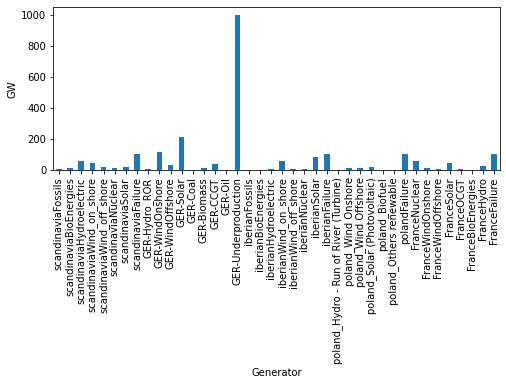

In [12]:
network.generators.p_nom_opt.div(1e3).plot.bar(ylabel="GW", figsize=(8, 3))

<Axes: xlabel='snapshot', ylabel='GW'>

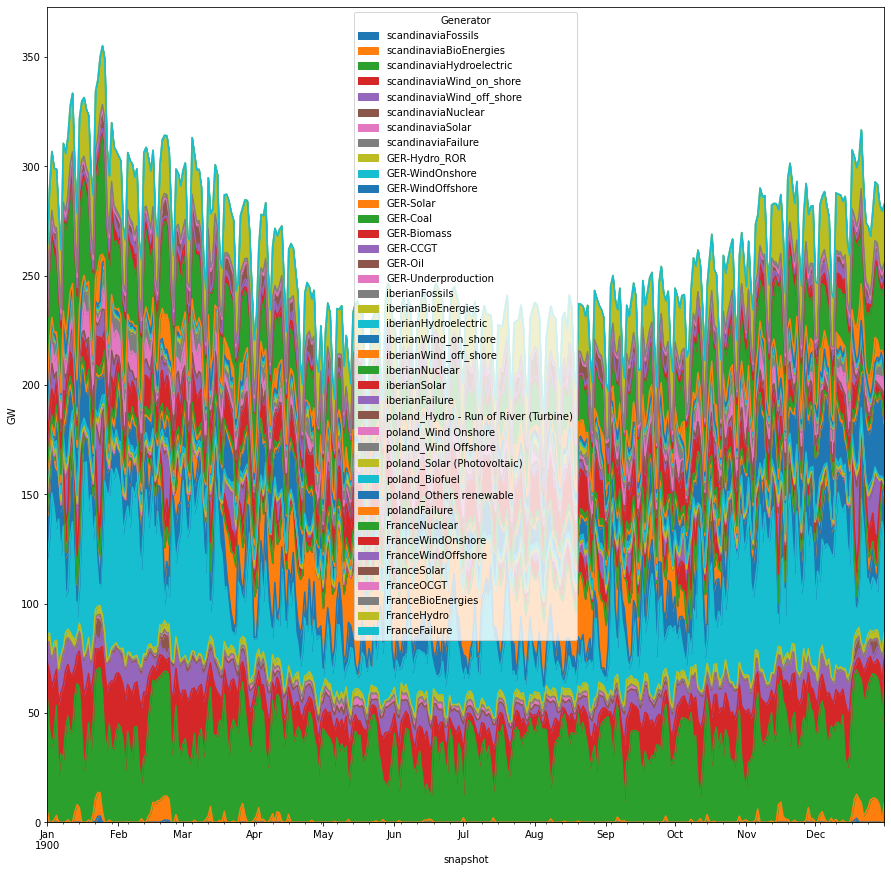

In [58]:
network.generators_t.p['scandinaviaFailure'] = network.generators_t.p['scandinaviaFailure'].clip(lower=0)
network.generators_t.p['GER-Underproduction'] = network.generators_t.p['GER-Underproduction'].clip(lower=0)
network.generators_t.p['GER-CCGT'] = network.generators_t.p['GER-CCGT'].clip(lower=0)
network.generators_t.p['iberianFailure'] = network.generators_t.p['iberianFailure'].clip(lower=0)
network.generators_t.p['polandFailure'] = network.generators_t.p['polandFailure'].clip(lower=0)
network.generators_t.p['FranceOCGT'] = network.generators_t.p['FranceOCGT'].clip(lower=0)
network.generators_t.p['FranceFailure'] = network.generators_t.p['FranceFailure'].clip(lower=0)
network.generators_t.p['FranceOCGT'] = network.generators_t.p['FranceOCGT'].clip(lower=0)
network.generators_t.p['FranceOCGT'] = network.generators_t.p['FranceOCGT'].clip(lower=0)

network.generators_t.p.resample('D').mean().div(1e3).plot.area(figsize=(15,15), subplots=False, ylabel="GW")

array([<Axes: xlabel='snapshot', ylabel='GW'>,
       <Axes: xlabel='snapshot', ylabel='GW'>,
       <Axes: xlabel='snapshot', ylabel='GW'>,
       <Axes: xlabel='snapshot', ylabel='GW'>,
       <Axes: xlabel='snapshot', ylabel='GW'>,
       <Axes: xlabel='snapshot', ylabel='GW'>,
       <Axes: xlabel='snapshot', ylabel='GW'>,
       <Axes: xlabel='snapshot', ylabel='GW'>,
       <Axes: xlabel='snapshot', ylabel='GW'>,
       <Axes: xlabel='snapshot', ylabel='GW'>,
       <Axes: xlabel='snapshot', ylabel='GW'>,
       <Axes: xlabel='snapshot', ylabel='GW'>,
       <Axes: xlabel='snapshot', ylabel='GW'>,
       <Axes: xlabel='snapshot', ylabel='GW'>,
       <Axes: xlabel='snapshot', ylabel='GW'>,
       <Axes: xlabel='snapshot', ylabel='GW'>,
       <Axes: xlabel='snapshot', ylabel='GW'>,
       <Axes: xlabel='snapshot', ylabel='GW'>,
       <Axes: xlabel='snapshot', ylabel='GW'>,
       <Axes: xlabel='snapshot', ylabel='GW'>,
       <Axes: xlabel='snapshot', ylabel='GW'>,
       <Axes:

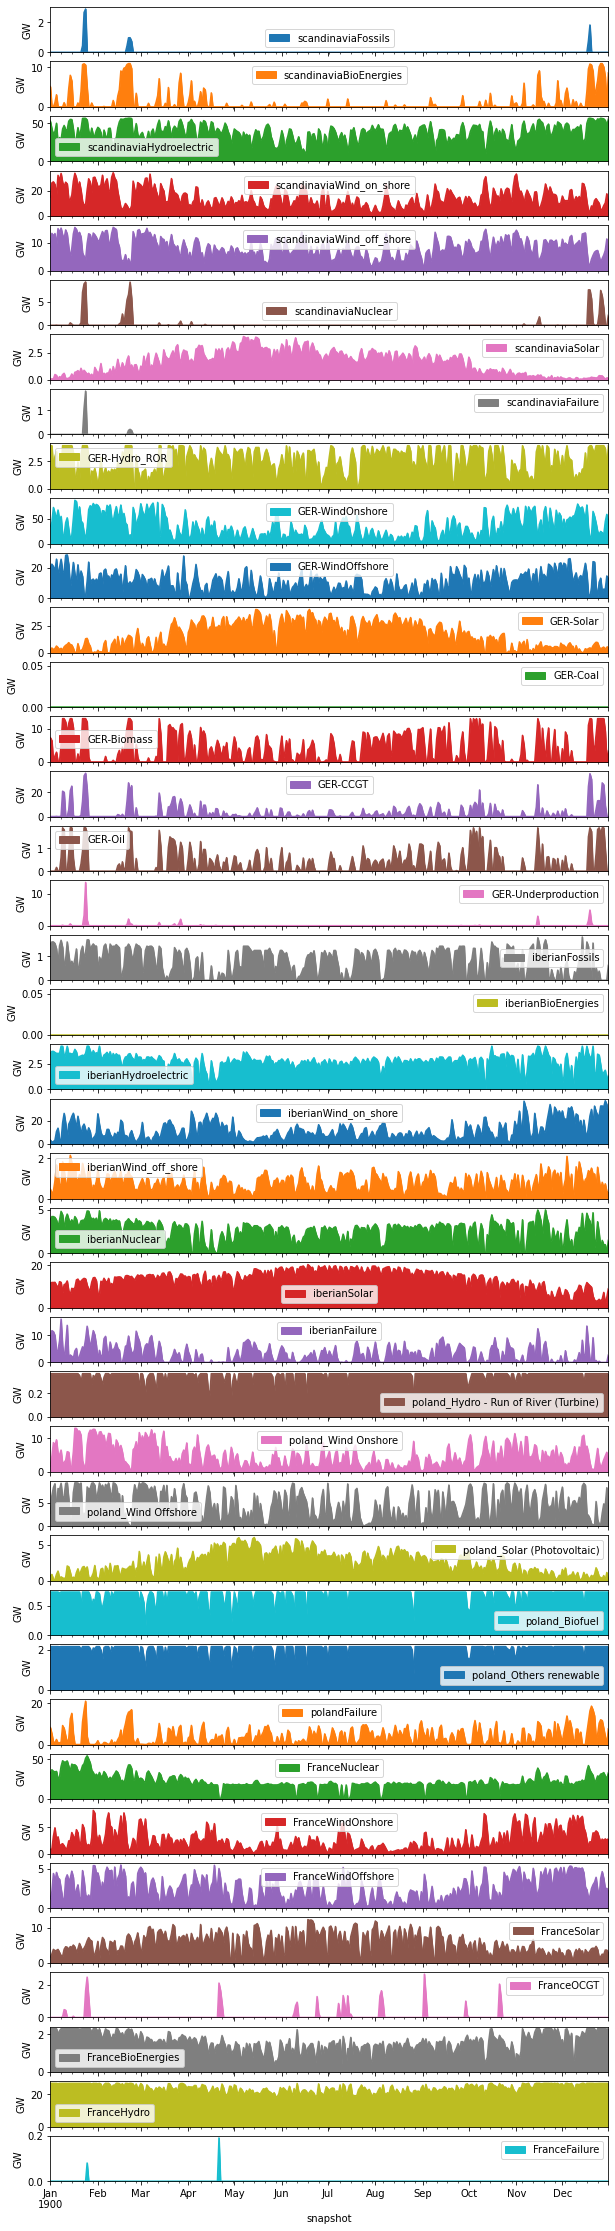

In [56]:
network.generators_t.p.resample('D').mean().div(1e3).plot.area(figsize=(10,40), subplots=True, ylabel="GW")

In [22]:
network.generators.carrier.unique()

array(['Fossils', 'BioEnergies', 'Hydro', 'Wind_on_shore',
       'Wind_off_shore', 'Nuclear', 'Solar', 'Failure', 'Wind', 'Coal',
       'Biomass', 'Gas', 'Oil', 'Biofuel', 'Others_renewable', 'H2'],
      dtype=object)

<Axes: title={'center': 'European Solar Production'}, xlabel='snapshot', ylabel='GW'>

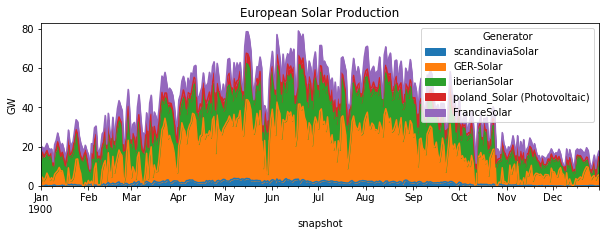

In [43]:
# Afficher production solaire européenne
network.generators_t.p.loc[:, network.generators.carrier == "Solar"].resample("D").mean().div(1e3).plot.area(
    figsize=(10, 3),
    ylabel="GW",
    title="European Solar Production",
)

<Axes: title={'center': 'European Hydro Production'}, xlabel='snapshot', ylabel='GW'>

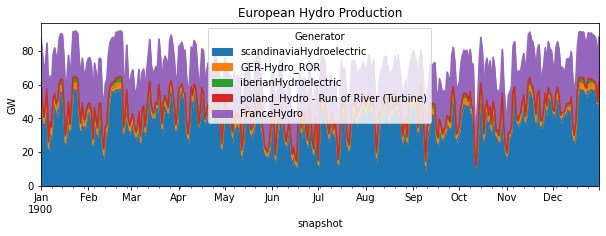

In [44]:
# Afficher production hydro européenne
network.generators_t.p.loc[:, network.generators.carrier == "Hydro"].resample("D").mean().div(1e3).plot.area(
    figsize=(10, 3),
    ylabel="GW",
    title="European Hydro Production",
)

<Axes: title={'center': 'European Wind Production'}, xlabel='snapshot', ylabel='GW'>

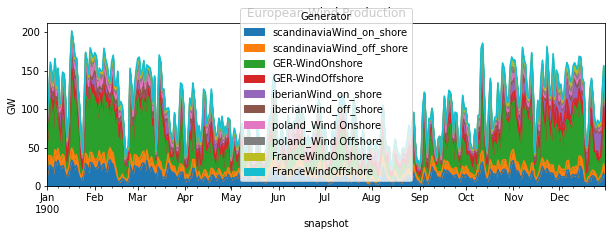

In [50]:
# Afficher production éolienne européenne
list_wind = ["Wind_off_shore", "Wind_on_shore", "Wind"]
network.generators_t.p.loc[:, network.generators.carrier.isin(list_wind)].resample("D").mean().div(1e3).plot.area(
    figsize=(10, 3),
    ylabel="GW",
    title="European Wind Production",
)

<Axes: title={'center': 'European Nuclear Production'}, xlabel='snapshot', ylabel='GW'>

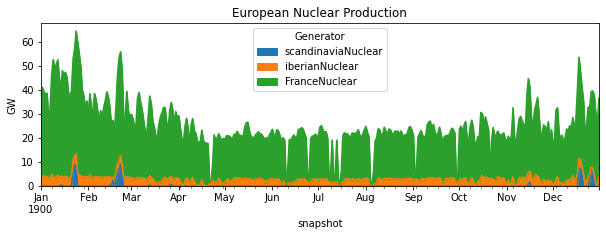

In [53]:
# Afficher production nucléaire européenne
network.generators_t.p.loc[:, network.generators.carrier == "Nuclear"].resample("D").mean().div(1e3).plot.area(
    figsize=(10, 3),
    ylabel="GW",
    title="European Nuclear Production",
)

<Axes: title={'center': 'European Thermal Production'}, xlabel='snapshot', ylabel='GW'>

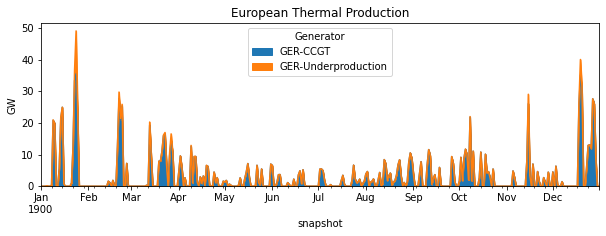

In [55]:
# Afficher production thermique européenne
network.generators_t.p.loc[:, network.generators.carrier == "Gas"].resample("D").mean().div(1e3).plot.area(
    figsize=(10, 3),
    ylabel="GW",
    title="European Thermal Production",
)

<Axes: title={'center': 'European Coal Production'}, xlabel='snapshot', ylabel='GW'>

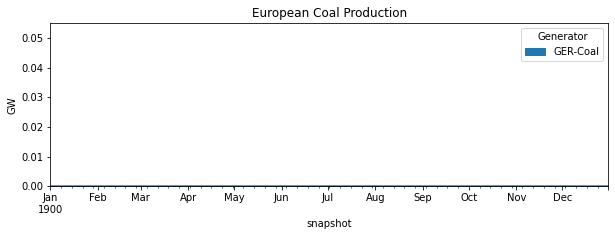

In [59]:
# Afficher production charbon europe
network.generators_t.p.loc[:, network.generators.carrier == "Coal"].resample("D").mean().div(1e3).plot.area(
    figsize=(10, 3),
    ylabel="GW",
    title="European Coal Production",
)

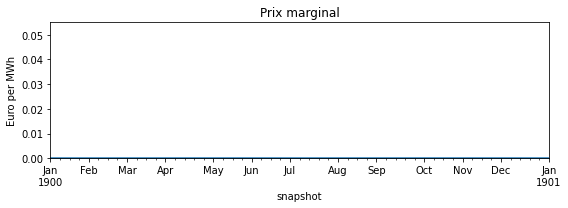

In [52]:
network.buses_t.marginal_price.mean(1).resample('1W').mean().clip(0,20).plot.area(figsize=(8, 3), ylabel="Euro per MWh", title="Prix marginal")
plt.tight_layout()